**Partie 2 — TP en Python**

**Exercice 1   — Détection de fraudes par carte de crédit**

1.  Charger le jeu de données de détection de fraude par carte de crédit “creditcard.csv”. 

In [16]:
import pandas as pd

df = pd.read_csv("creditcard.csv")


2.  Effectuer une analyse de données exploratoire (Exploratory Data Analysis : EDA) 
pour comprendre la distribution des transactions et des variables pertinentes. 

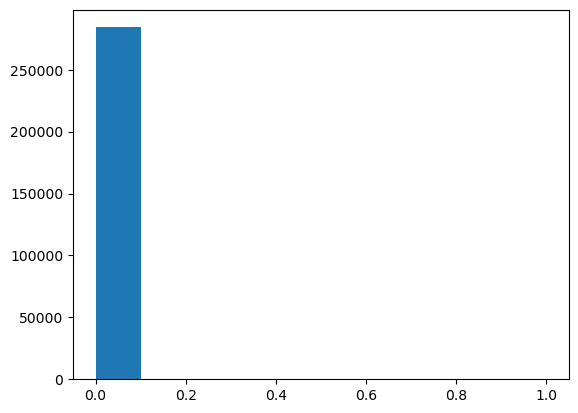

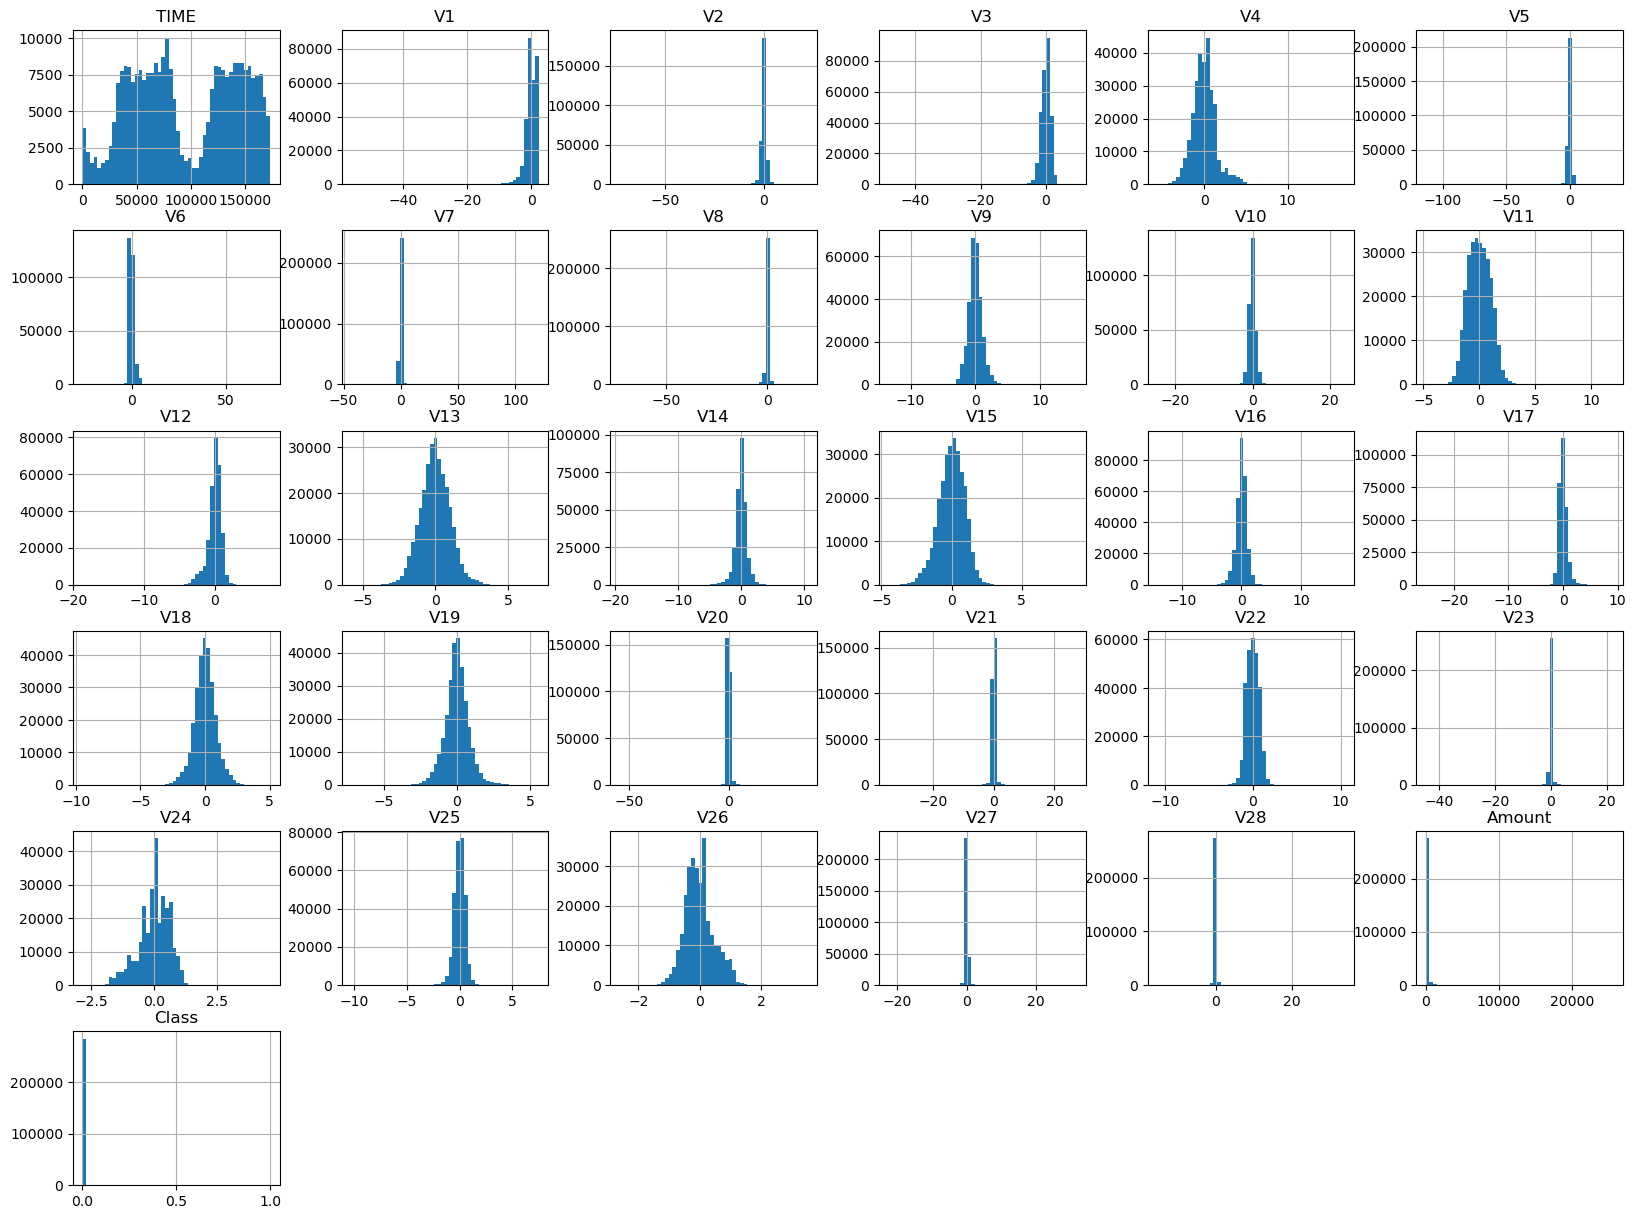

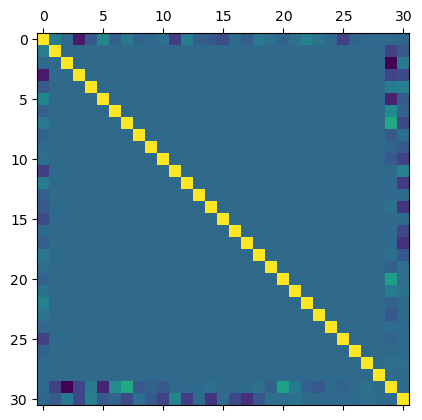

In [17]:
import matplotlib.pyplot as plt

# Voir la distribution des transactions
plt.hist(df['Class'])
plt.show()

# Voir la distribution des variables numériques
df.hist(bins=50, figsize=(20,15))
plt.show()

# Voir les corrélations entre les variables numériques
corr_matrix = df.corr()
plt.matshow(corr_matrix)
plt.show()


3.  Prétraiter les données pour les rendre appropriées pour la clustering (par exemple, 
standardiser les variables numériques)

In [18]:
print(df.columns)


Index(['TIME', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [20]:
from sklearn.preprocessing import StandardScaler

# Sélectionner les variables numériques à utiliser pour la clustering
num_vars = ['TIME', 'Amount'] + [f'V{i}' for i in range(1, 29)]

# Standardiser les variables numériques
scaler = StandardScaler()
df[num_vars] = scaler.fit_transform(df[num_vars])



4.  Appliquer des algorithmes de clustering tels que K-means, DBSCAN, HCA, etc., pour 
identifier des groupes de transactions similaires. 

In [21]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# K-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df[num_vars])

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df[num_vars])

# HCA
hca = AgglomerativeClustering(n_clusters=2)
hca.fit(df[num_vars])


/home/o/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MemoryError: Unable to allocate 302. GiB for an array with shape (40557371221,) and data type float64

5. Evaluation des résultats :

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Silhouette score
print("K-means Silhouette score:", silhouette_score(df[num_vars], kmeans.labels_))
print("DBSCAN Silhouette score:", silhouette_score(df[num_vars], dbscan.labels_))
print("HCA Silhouette score:", silhouette_score(df[num_vars], hca.labels_))

# Calinski-Harabasz score
print("K-means Calinski-Harabasz score:", calinski_harabasz_score(df[num_vars], kmeans.labels_))
print("DBSCAN Calinski-Harabasz score:", calinski_harabasz_score(df[num_vars], dbscan.labels_))
print("HCA Calinski-Harabasz score:", calinski_harabasz_score(df[num_vars], hca.labels_))


6.  Interpréter les résultats et identifier les transactions suspectes.

Le clustering permet d'identifier des groupes de transactions similaires. En fonction de la méthode de clustering utilisée, les transactions peuvent être regroupées en différents nombres de clusters. Ensuite, il est possible d'analyser les caractéristiques des transactions dans chaque cluster pour identifier les transactions suspectes.

Par exemple, si l'on utilise K-means avec 2 clusters et qu'on observe une différence marquée entre les caractéristiques des transactions dans chaque cluster, il est possible d'identifier les transactions suspectes en examinant celles qui ont des caractéristiques très différentes de celles des autres transactions de leur cluster.